In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


file_path = "data.xls" 
df = pd.read_excel(file_path)


In [6]:
df.head()

,Current(A),Voltage(V),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Charge_Capacity(Ah)
0,0.000000,3.411755,0.000000,0.0,0.000000,0.000000
1,0.999834,3.517305,0.009761,0.0,0.001295,0.002782
2,0.999834,3.527665,0.019561,0.0,0.000874,0.005563
3,0.999834,3.535598,0.029370,0.0,0.000710,0.008341
4,1.000014,3.542073,0.039199,0.0,0.000583,0.011118


In [7]:

X = df.drop(columns=["Charge_Capacity(Ah)"])  # Features
y = df["Charge_Capacity(Ah)"]  # Target

In [8]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [9]:
model = SVR(kernel='rbf')  # Using Radial Basis Function kernel
model.fit(X_train, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.004557968621763381
R² Score: 0.9562827038787517


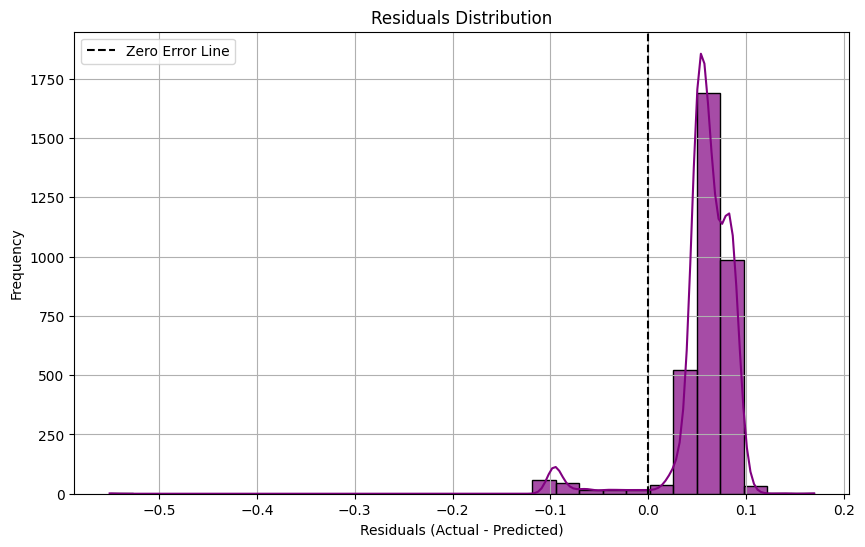

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


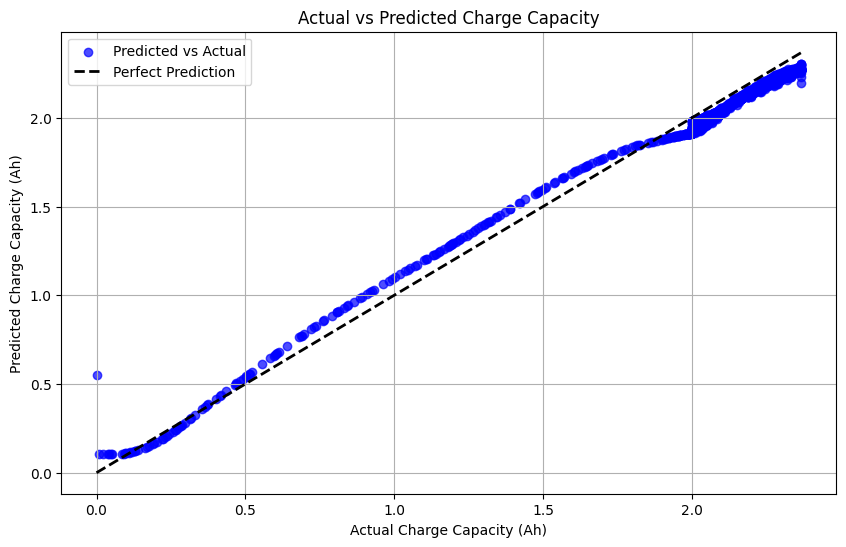

In [18]:

import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Charge Capacity')
plt.xlabel('Actual Charge Capacity (Ah)')
plt.ylabel('Predicted Charge Capacity (Ah)')
plt.legend()
plt.grid(True)
plt.show()



In [51]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor  # For neural network model



X = df[['Current(A)', 'Voltage(V)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'dV/dt(V/s)']]  # Feature columns
y = df['Charge_Capacity(Ah)']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)





Mean Squared Error: 6.587186494730414e-05
R² Score: 0.999402047678653


In [52]:
# Step 5: Calculate error metrics (MSE, R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 6.587186494730414e-05
R² Score: 0.999402047678653


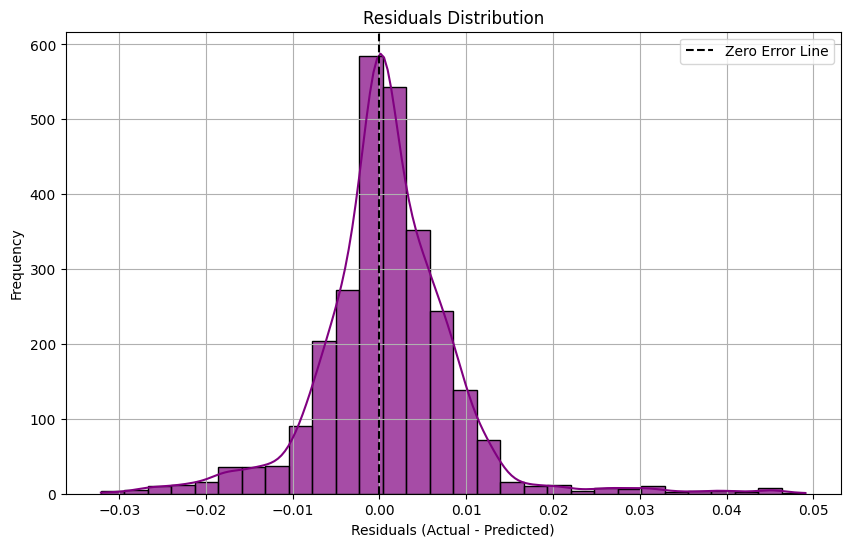

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


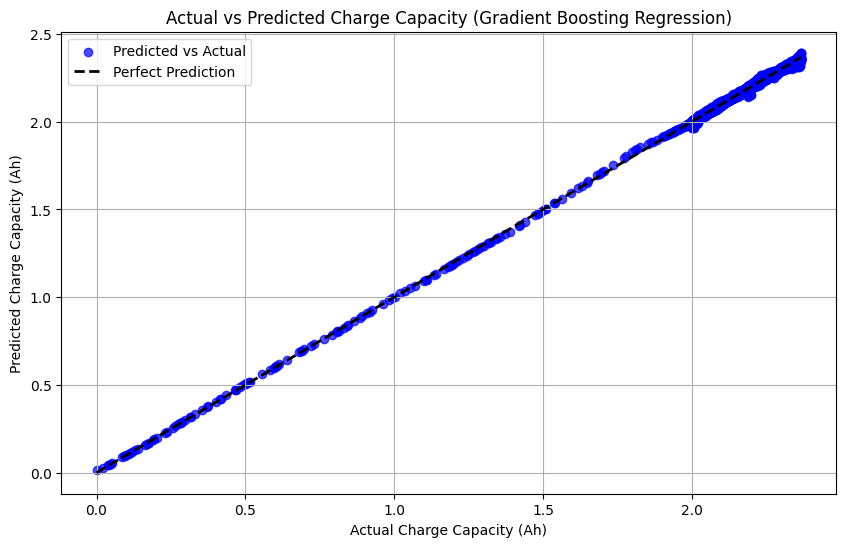

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Charge Capacity (Gradient Boosting Regression)')
plt.xlabel('Actual Charge Capacity (Ah)')
plt.ylabel('Predicted Charge Capacity (Ah)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting Regression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


X = df[['Current(A)', 'Voltage(V)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'dV/dt(V/s)']]  # Feature columns
y = df['Charge_Capacity(Ah)']  # Target column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 5.678195648194268e-06
R² Score: 0.999948456138723


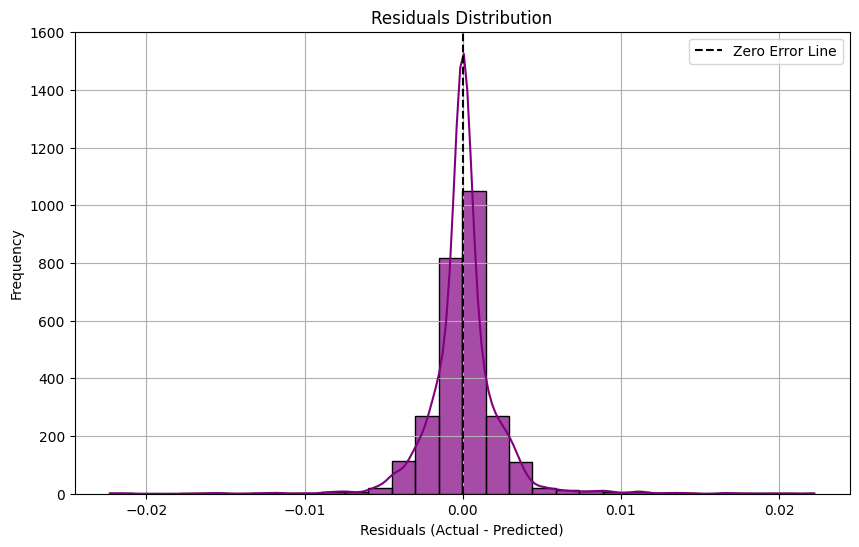

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=30, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', label='Zero Error Line')
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

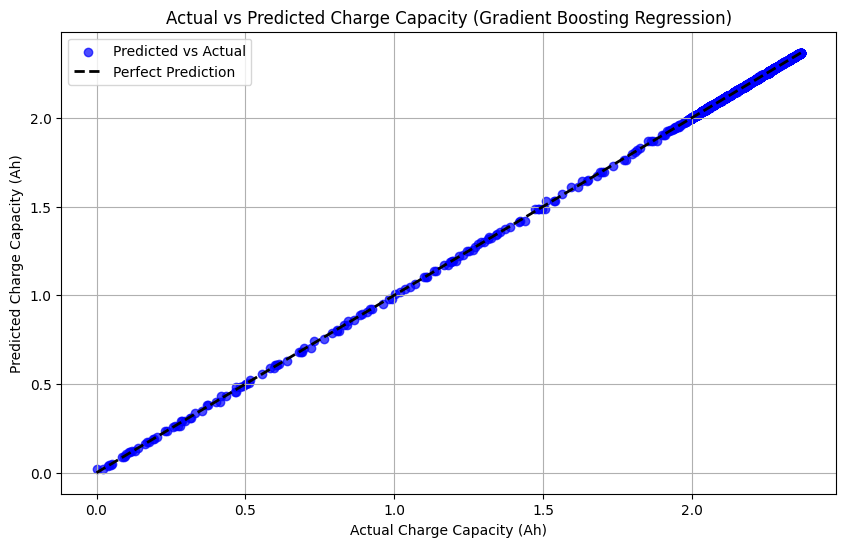

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Charge Capacity (Gradient Boosting Regression)')
plt.xlabel('Actual Charge Capacity (Ah)')
plt.ylabel('Predicted Charge Capacity (Ah)')
plt.legend()
plt.grid(True)
plt.show()